# **Mariam Benazouz**
#**HW #1- BIOEN 437**  

In [ ]:
!pip install libroadrunner --upgrade 
!pip install tellurium 
!pip install tableprint

In [ ]:
import tellurium as te
import numpy as np
import roadrunner
import tableprint
import matplotlib.pyplot as plt

# **Problem 1a**


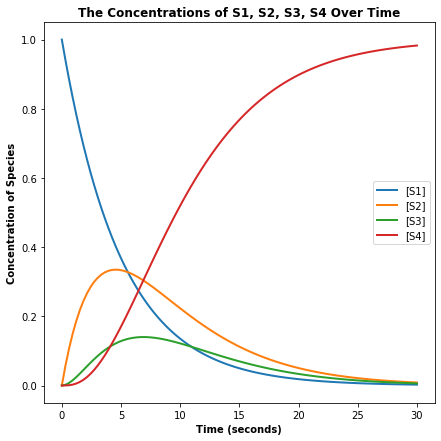

RuntimeError: Object of type <class 'NamedArray'> appears to be C subclassed NumPy array, void scalar, or allocated in a non-standard way.NumPy reserves the right to change the size of these structures. Projects are required to take this into account by either recompiling against a specific NumPy version or padding the struct and enforcing a maximum NumPy version.


In [ ]:
r = te.loada("""
S1 -> S2; k1*S1;
S2 -> S3; k2*S2;
S3 -> S4; k3*S3;
k1 = 0.2; k2 = 0.24; k3 = 0.52
S1 = 1
""")
m = r.simulate (0, 30, 100) #Three arguments=timeStart, timeEnd, numberOfPoints
r.plot(title="The Concentrations of S1, S2, S3, S4 Over Time", ytitle="Concentration of Species", xtitle="Time (seconds)", figsize=(7,7))


# **Problem 1b**


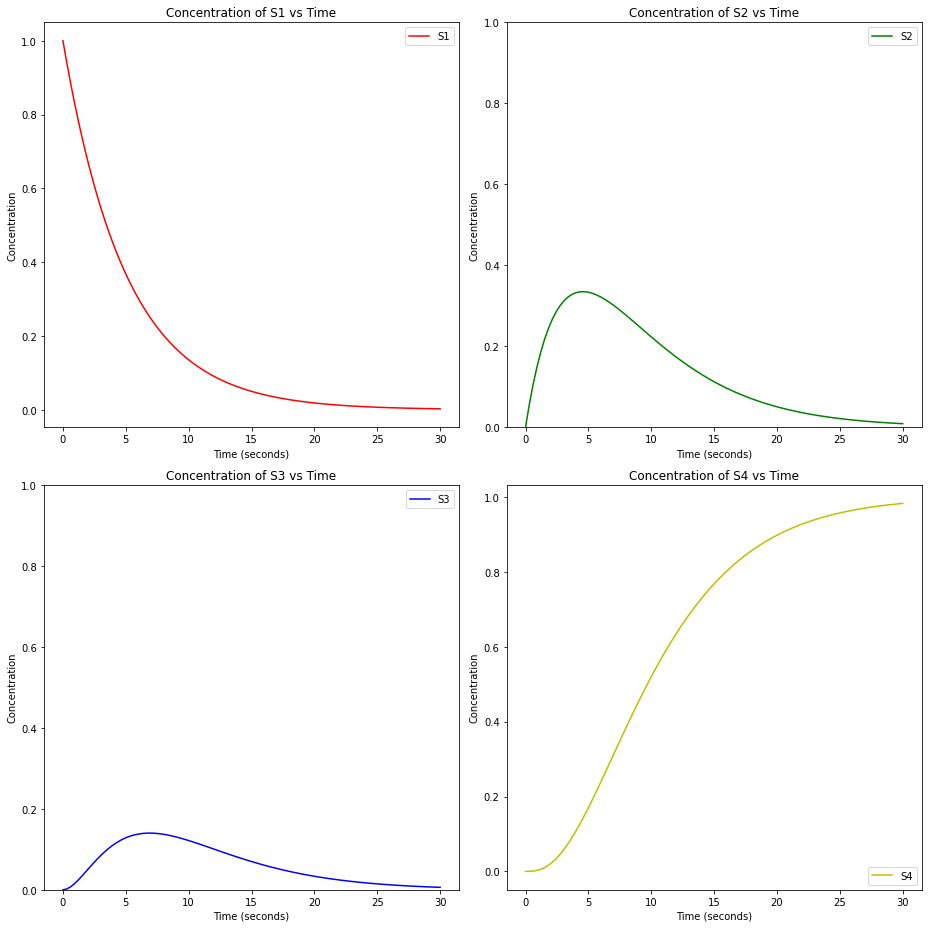

In [ ]:
r = te.loada("""
S1 -> S2; k1*S1;
S2 -> S3; k2*S2;
S3 -> S4; k3*S3;
k1 = 0.2; k2 = 0.24; k3 = 0.52
S1 = 1
""")
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(13,13), sharey=True)

a = r.simulate (0, 30, 100, ['Time', 'S1']) #Three main arguments=timeStart, timeEnd, numberOfPoints
r.reset() # reset the simulation since I am running multiple simulations

b = r.simulate (0, 30, 100, ['Time', 'S2']) 
r.reset()

c = r.simulate (0, 30, 100, ['Time', 'S3']) 
r.reset()

d = r.simulate (0, 30, 100, ['Time', 'S4']) 

plt.subplot(2, 2, 1)
plt.plot(a['time'], a['S1'], 'r', label="S1");
plt.legend(loc="upper right")
plt.title('Concentration of S1 vs Time')
plt.ylabel('Concentration')
plt.xlabel('Time (seconds)')

plt.subplot(2, 2, 2)
plt.plot(b['time'], b['S2'], 'g', label="S2");
plt.legend(loc="upper right")
plt.title('Concentration of S2 vs Time')
plt.ylabel('Concentration')
plt.xlabel('Time (seconds)')
plt.ylim(0,1)


plt.subplot(2, 2, 3)
plt.plot(c['time'], c['S3'], 'b', label="S3");
plt.legend(loc="upper right")
plt.title('Concentration of S3 vs Time')
plt.ylabel('Concentration')
plt.xlabel('Time (seconds)')
plt.ylim(0,1)


plt.subplot(2, 2, 4)
plt.plot(d['time'], d['S4'], 'y', label="S4");
plt.legend(loc="lower right")
plt.title('Concentration of S4 vs Time')
plt.ylabel('Concentration')
plt.xlabel('Time (seconds)')

fig.tight_layout()  #spread out the figures so that they don't overlap

# **Problem 1c**


RuntimeError: Object of type <class 'NamedArray'> appears to be C subclassed NumPy array, void scalar, or allocated in a non-standard way.NumPy reserves the right to change the size of these structures. Projects are required to take this into account by either recompiling against a specific NumPy version or padding the struct and enforcing a maximum NumPy version.
RuntimeError: Object of type <class 'NamedArray'> appears to be C subclassed NumPy array, void scalar, or allocated in a non-standard way.NumPy reserves the right to change the size of these structures. Projects are required to take this into account by either recompiling against a specific NumPy version or padding the struct and enforcing a maximum NumPy version.
RuntimeError: Object of type <class 'NamedArray'> appears to be C subclassed NumPy array, void scalar, or allocated in a non-standard way.NumPy reserves the right to change the size of these structures. Projects are required to take this into account by either recom

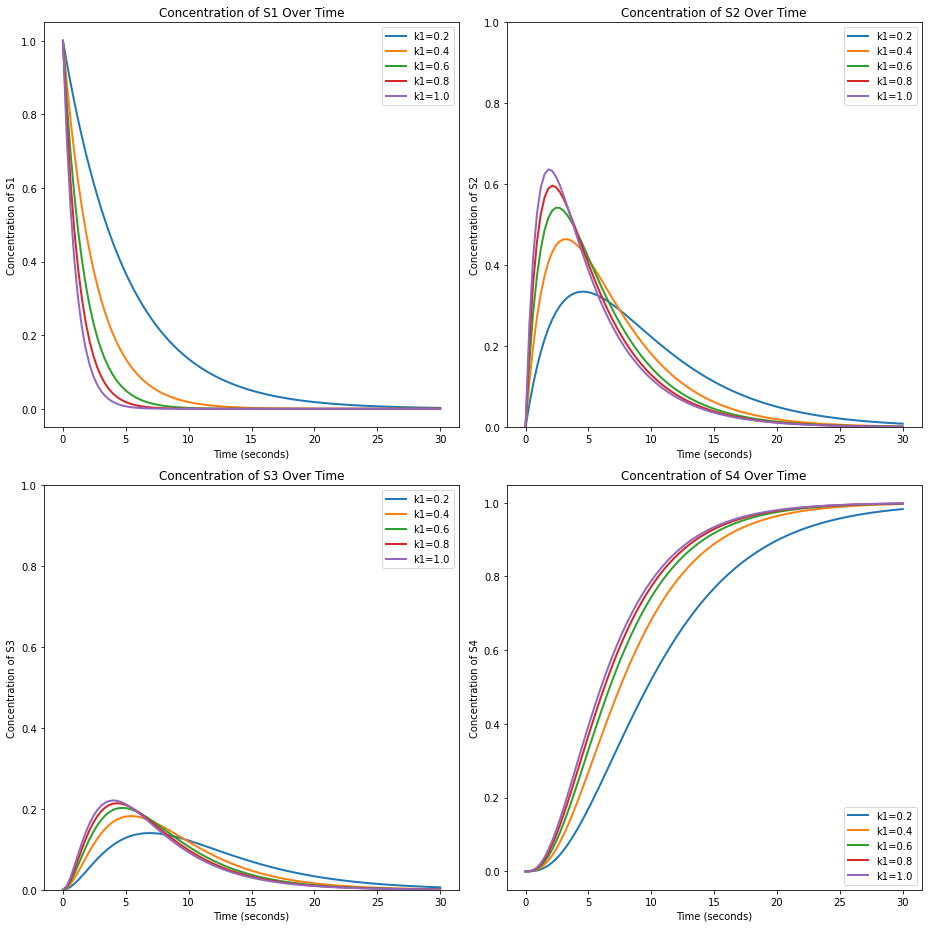

In [ ]:
r = te.loada("""
  S1 -> S2; k1*S1;
  S2 -> S3; k2*S2;
  S3 -> S4; k3*S3;
  k1 = 0.2; k2 = 0.24; k3 = 0.52
  S1 = 1
""")
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(13,13))

k1Values=[.2, .4, .6, .8, 1] #k1 increases by .2 increments 5 times

for r.k1 in k1Values:
  m = r.simulate (0,30, 100)

  ax[0,0].plot(m['time'], m['[S1]'], label="k1={}".format(r.k1), linewidth=2)

  ax[0,1].plot(m['time'], m['[S2]'], label="k1={}".format(r.k1), linewidth=2)
  ax[0,1].set_ylim([0, 1])

  ax[1,0].plot(m['time'], m['[S3]'], label="k1={}".format(r.k1), linewidth=2)
  ax[1,0].set_ylim([0, 1])

  ax[1,1].plot(m['time'], m['[S4]'], label="k1={}".format(r.k1), linewidth=2)
  r.reset() #reset simulation since we are running it 5 times

ax[0][0].legend()

ax[0][1].legend()

ax[1][0].legend()

ax[1][1].legend(loc="lower right")


ax[0][0].set(title="Concentration of S1 Over Time", xlabel="Time (seconds)", ylabel="Concentration of S1")

ax[0][1].set(title="Concentration of S2 Over Time", xlabel="Time (seconds)", ylabel="Concentration of S2")

ax[1][0].set(title="Concentration of S3 Over Time", xlabel="Time (seconds)", ylabel="Concentration of S3")

ax[1][1].set(title="Concentration of S4 Over Time", xlabel="Time (seconds)", ylabel="Concentration of S4")

fig.tight_layout()


# **Problem 2a**


<Figure size 1080x1080 with 0 Axes>

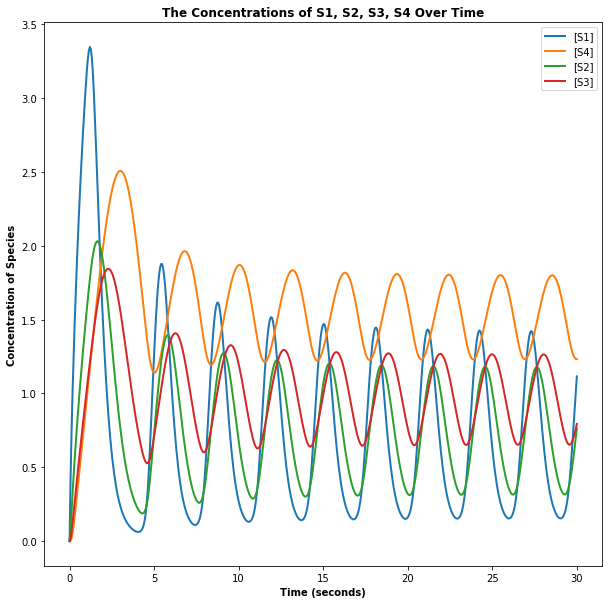

RuntimeError: Object of type <class 'NamedArray'> appears to be C subclassed NumPy array, void scalar, or allocated in a non-standard way.NumPy reserves the right to change the size of these structures. Projects are required to take this into account by either recompiling against a specific NumPy version or padding the struct and enforcing a maximum NumPy version.


In [ ]:
r = te.loada ('''
// Reactions:
J0: $X0 -> S1; (VM1 * (X0 - S1/Keq1))/(1 + X0 + S1 + S4^h);
J1: S1 -> S2; (10 * S1 - 2 * S2) / (1 + S1 + S2);
J2: S2 -> S3; (10 * S2 - 2 * S3) / (1 + S2 + S3);
J3: S3 -> S4; (10 * S3 - 2 * S4) / (1 + S3 + S4);
J4: S4 -> $X1; (V4 * S4) / (KS4 + S4);
// Species initialization:
S1 = 0; S2 = 0; S3 = 0;
S4 = 0; X0 = 10; X1 = 0;
// Variable initialization:
VM1 = 10; Keq1 = 10; h = 10; V4 = 2.5; KS4 = 0.5;
''')
m = r.simulate (0, 30, 500)
plt.figure (figsize=(15,15))

r.plot(title="The Concentrations of S1, S2, S3, S4 Over Time", ytitle="Concentration of Species", xtitle="Time (seconds)", figsize=(10,10))


# **Problem 2b**


/usr/local/lib/python3.7/dist-packages/roadrunner/roadrunner.py:3944: UserWarning:

Simulation requested end point (800) not reached, because the maximum number of steps reached.  Possible solutions include:
  * Setting an explicit number of points (i.e. r.simulate(0, 800, 1001)
  * Setting r.integrator.variable_step_size to 'False'
* Setting 

RuntimeError: Object of type <class 'NamedArray'> appears to be C subclassed NumPy array, void scalar, or allocated in a non-standard way.NumPy reserves the right to change the size of these structures. Projects are required to take this into account by either recompiling against a specific NumPy version or padding the struct and enforcing a maximum NumPy version.


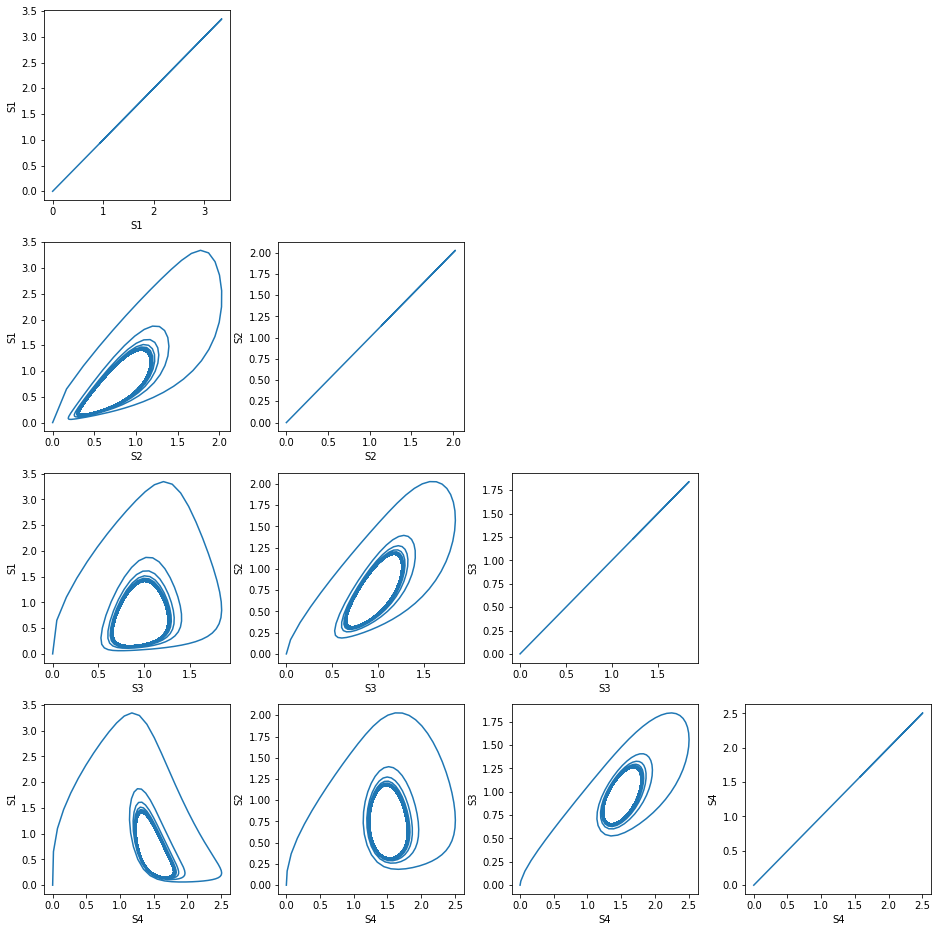

In [ ]:
r = te.loada ('''
// Reactions:
J0: $X0 -> S1; (VM1 * (X0 - S1/Keq1))/(1 + X0 + S1 + S4^h);
J1: S1 -> S2; (10 * S1 - 2 * S2) / (1 + S1 + S2);
J2: S2 -> S3; (10 * S2 - 2 * S3) / (1 + S2 + S3);
J3: S3 -> S4; (10 * S3 - 2 * S4) / (1 + S3 + S4);
J4: S4 -> $X1; (V4 * S4) / (KS4 + S4);
// Species initialization:
S1 = 0; S2 = 0; S3 = 0;
S4 = 0; X0 = 10; X1 = 0;
// Variable initialization:
VM1 = 10; Keq1 = 10; h = 10; V4 = 2.5; KS4 = 0.5;
''')
m = r.simulate (0, 800, 8000, ['S1', 'S2','S3','S4']) #only return concentrations

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(13,13)) #4 by 4 subplot format

#plots in order from top to bottom, left to right
ax[0,0].plot(m['S1'], m['S1']) #plotting the top graph
ax[0,0].set_xlabel("S1")	
ax[0,0].set_ylabel("S1")	


ax[1,0].plot(m['S2'], m['S1'])
ax[1,0].set_xlabel("S2")	
ax[1,0].set_ylabel("S1")

ax[1,1].plot(m['S2'], m['S2'])
ax[1,1].set_xlabel("S2")	
ax[1,1].set_ylabel("S2")

ax[2,0].plot(m['S3'], m['S1'])
ax[2,0].set_xlabel("S3")	
ax[2,0].set_ylabel("S1")

ax[2,1].plot(m['S3'], m['S2'])
ax[2,1].set_xlabel("S3")	
ax[2,1].set_ylabel("S2")

ax[2,2].plot(m['S3'], m['S3'])
ax[2,2].set_xlabel("S3")	
ax[2,2].set_ylabel("S3")

ax[3,0].plot(m['S4'], m['S1'])
ax[3,0].set_xlabel("S4")	
ax[3,0].set_ylabel("S1") 

ax[3,1].plot(m['S4'], m['S2'])
ax[3,1].set_xlabel("S4")	
ax[3,1].set_ylabel("S2")

ax[3,2].plot(m['S4'], m['S3']) 
ax[3,2].set_xlabel("S4")	
ax[3,2].set_ylabel("S3")

ax[3,3].plot(m['S4'], m['S4'])
ax[3,3].set_xlabel("S4")	
ax[3,3].set_ylabel("S4")

fig.delaxes(ax[0,1]) #delete empty axes
fig.delaxes(ax[0,2])
fig.delaxes(ax[0,3])
fig.delaxes(ax[1,2])
fig.delaxes(ax[1,3])
fig.delaxes(ax[2,3])

fig.tight_layout()


# **Problem 2c**


/usr/local/lib/python3.7/dist-packages/roadrunner/roadrunner.py:3944: UserWarning:

Simulation requested end point (800) not reached, because the maximum number of steps reached.  Possible solutions include:
  * Setting an explicit number of points (i.e. r.simulate(0, 800, 1001)
  * Setting r.integrator.variable_step_size to 'False'
* Setting 

RuntimeError: Object of type <class 'NamedArray'> appears to be C subclassed NumPy array, void scalar, or allocated in a non-standard way.NumPy reserves the right to change the size of these structures. Projects are required to take this into account by either recompiling against a specific NumPy version or padding the struct and enforcing a maximum NumPy version.


Text(0.5, 1.0, 'Elasticity vs. Eigenvalues')

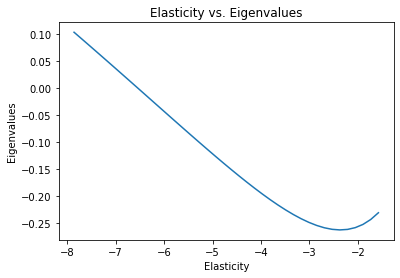

In [ ]:
r = te.loada ('''
// Reactions:
J0: $X0 -> S1; (VM1 * (X0 - S1/Keq1))/(1 + X0 + S1 + S4^h);
J1: S1 -> S2; (10 * S1 - 2 * S2) / (1 + S1 + S2);
J2: S2 -> S3; (10 * S2 - 2 * S3) / (1 + S2 + S3);
J3: S3 -> S4; (10 * S3 - 2 * S4) / (1 + S3 + S4);
J4: S4 -> $X1; (V4 * S4) / (KS4 + S4);
// Species initialization:
S1 = 0; S2 = 0; S3 = 0;
S4 = 0; X0 = 10; X1 = 0;
// Variable initialization:
VM1 = 10; Keq1 = 10; h = 10; V4 = 2.5; KS4 = 0.5;
''')
m = r.simulate (0, 800, 2000, ['S1', 'S2','S3','S4'])

elasticityValues=[]
firstEigenvalues=[]
r.h=2.2

for x in range(40):
  r.steadyState()
  fullEigenValues=r.getFullEigenValues() #extracted full eigenvalues
  realEigenValues=np.real(fullEigenValues) #extracted real parts from full eigenvalues
  firstEigenvalues.append(realEigenValues[0].real) #took real part of the 1st eigenvalue
  elasticityValues.append(r.getEE ('J0', 'S4')) #storing elasticity values
  r.h=r.h+.2 #h is increasing by increments of .2 each loop

plt.plot(elasticityValues, firstEigenvalues)
plt.xlabel('Elasticity') 
plt.ylabel('Eigenvalues') 
plt.title('Elasticity vs. Eigenvalues') 

# **Problem 2d**

# **What does the crossing point signify?**

#*The crossing point signifies the system going from unstable to stable. This is because it starts out with positive eigenvalues (which signify instability) and then after the crossing point, the eigenvalues are negative, which would signify the stability of the system.


# **Problem 2e**


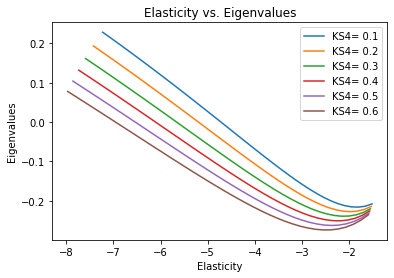

In [ ]:
r = te.loada ('''
// Reactions:
J0: $X0 -> S1; (VM1 * (X0 - S1/Keq1))/(1 + X0 + S1 + S4^h);
J1: S1 -> S2; (10 * S1 - 2 * S2) / (1 + S1 + S2);
J2: S2 -> S3; (10 * S2 - 2 * S3) / (1 + S2 + S3);
J3: S3 -> S4; (10 * S3 - 2 * S4) / (1 + S3 + S4);
J4: S4 -> $X1; (V4 * S4) / (KS4 + S4);
// Species initialization:
S1 = 0; S2 = 0; S3 = 0;
S4 = 0; X0 = 10; X1 = 0;
// Variable initialization:
VM1 = 10; Keq1 = 10; h = 10; V4 = 2.5; KS4 = 0.5;
''')
m = r.simulate (0, 800, 2000, ['S1', 'S2','S3','S4'])

r.KS4=0.1

for x in range(6):
  elasticityValues=[]
  firstEigenvalues=[]
  r.h=2.2

  for x in range(40):
    r.steadyState()
    fullEigenValues=r.getFullEigenValues() #extracted full eigenvalues
    realEigenValues=np.real(fullEigenValues) #extracted real parts from full eigenvalues
    firstEigenvalues.append(realEigenValues[0].real) #took real part of the 1st eigenvalue
    elasticityValues.append(r.getEE ('J0', 'S4'))
    r.h=r.h+.2

  plt.plot(elasticityValues, firstEigenvalues, label="KS4={:4.1f}".format(r.KS4))
  plt.legend()
  plt.xlabel('Elasticity') 
  plt.ylabel('Eigenvalues') 
  plt.title('Elasticity vs. Eigenvalues') 
  r.KS4=0.1+r.KS4


# **Problem 2f**
# **Describe how the stability of the system is influenced by KS4. i.e do you require more or less feedback strength as KS4 increases in order to generate oscillations?**

#* When KS4 increases, more feedback strength is required to destabilize the system. We can see this in the graph since the greater KS4 values are associated with lower eigenvalues at same elasticity (which means as KS4 increases, the system is more stable). 

